In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

num_epochs = 45
batch_size = 4
learning_rate = 0.001

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


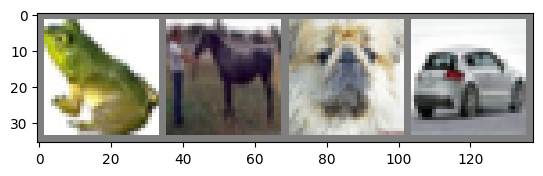

In [3]:
def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(train_loader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

In [4]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # -> n, 3, 32, 32
        x = self.pool(F.relu(self.conv1(x)))  # -> n, 6, 14, 14
        x = self.pool(F.relu(self.conv2(x)))  # -> n, 16, 5, 5
        x = x.view(-1, 16 * 5 * 5)            # -> n, 400
        x = F.relu(self.fc1(x))               # -> n, 120
        x = F.relu(self.fc2(x))               # -> n, 84
        x = self.fc3(x)                       # -> n, 10
        return x


model = ConvNet().to(device)

In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 2000 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

Epoch [1/45], Step [2000/12500], Loss: 2.3001
Epoch [1/45], Step [4000/12500], Loss: 2.3287
Epoch [1/45], Step [6000/12500], Loss: 2.2984
Epoch [1/45], Step [8000/12500], Loss: 2.2734
Epoch [1/45], Step [10000/12500], Loss: 2.2330
Epoch [1/45], Step [12000/12500], Loss: 2.2985
Epoch [2/45], Step [2000/12500], Loss: 2.1137
Epoch [2/45], Step [4000/12500], Loss: 2.0463
Epoch [2/45], Step [6000/12500], Loss: 1.7526
Epoch [2/45], Step [8000/12500], Loss: 2.0360
Epoch [2/45], Step [10000/12500], Loss: 1.5252
Epoch [2/45], Step [12000/12500], Loss: 1.4366
Epoch [3/45], Step [2000/12500], Loss: 1.8243
Epoch [3/45], Step [4000/12500], Loss: 2.0575
Epoch [3/45], Step [6000/12500], Loss: 2.0539
Epoch [3/45], Step [8000/12500], Loss: 2.2578
Epoch [3/45], Step [10000/12500], Loss: 1.7515
Epoch [3/45], Step [12000/12500], Loss: 1.3122
Epoch [4/45], Step [2000/12500], Loss: 1.2080
Epoch [4/45], Step [4000/12500], Loss: 1.5008
Epoch [4/45], Step [6000/12500], Loss: 1.4643
Epoch [4/45], Step [8000/125

In [6]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    n_class_correct = [0 for i in range(10)]
    n_class_samples = [0 for i in range(10)]
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
        for i in range(batch_size):
            label = labels[i]
            pred = predicted[i]
            if (label == pred):
                n_class_correct[label] += 1
            n_class_samples[label] += 1

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

    for i in range(10):
        acc = 100.0 * n_class_correct[i] / n_class_samples[i]
        print(f'Accuracy of {classes[i]}: {acc} %')


Accuracy of the network: 63.45 %
Accuracy of plane: 62.1 %
Accuracy of car: 73.4 %
Accuracy of bird: 54.8 %
Accuracy of cat: 45.4 %
Accuracy of deer: 53.0 %
Accuracy of dog: 51.8 %
Accuracy of frog: 71.5 %
Accuracy of horse: 68.1 %
Accuracy of ship: 81.9 %
Accuracy of truck: 72.5 %
